# Arboles de Decisión y Optimización de Hiperparámetros


Comenzamos a trabajar con Optimización de Hiperparámetros en Python con Scikit-Learn.
Vamos a empezar con el conjunto de datos del dataset Breast Cancer Wisconsin (diagnostic). Al finalizar, proponemos un análisis similar, pero con otro conjunto de datos.

## 1. Breast Cancer Wisconsin (diagnostic) dataset

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import time
import warnings
warnings.filterwarnings('ignore')

**Para investigar:** ¿Reconoces todas las librerías que acabamos de importar y sus objetos? Si no es así, recuerda simpre leer la documentación.

Importamos el dataset:

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

Si observan la variable `data`, podrán notar que es un `diccionario`, por lo tanto vamos a proceder a convertirlo en un `DataFrame` de Pandas.

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Luego de explorarlo, simplemente vamos a seleccionar los atributos que utilizaremos.

In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(f"Dimensiones: {X.shape}")
print(f"Clases: {list(data.target_names)}")

Dimensiones: (569, 30)
Clases: [np.str_('malignant'), np.str_('benign')]


In [ ]:
# Visualización básica atributos
X.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
X.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
mean compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
mean concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
mean concave points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
mean symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


Ya separados los `features` (X) del `target` (y), podemos dividir los datos en conjunto de `train` y `test`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, #stratify) #https://www.kaggle.com/discussions/general/336747

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (455, 30)
Tamaño de prueba: (114, 30)


Genial, ¡ya tenemos listos nuestros datos!


Ahora vamos a escoger un modelo de clasificación, vamos con un `DecisionTreeClassifier`. Luego, puedes probar con algún otro clasificador.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Creo el modelo supervisado - arbol de decisión
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Exactitud: 0.9473684210526315


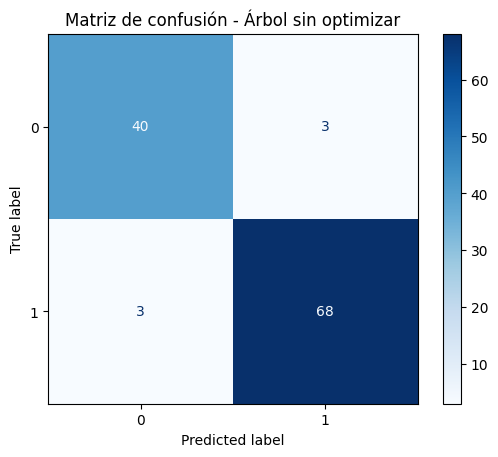

In [ ]:
# Evaluación del modelo
y_pred = tree1.predict(X_test)
print('Exactitud:', accuracy_score(y_test, y_pred))

# Matriz de confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[0,1]).plot(cmap='Blues')
plt.title("Matriz de confusión - Árbol sin optimizar")
plt.show()

acc_base = accuracy_score(y_test, y_pred)

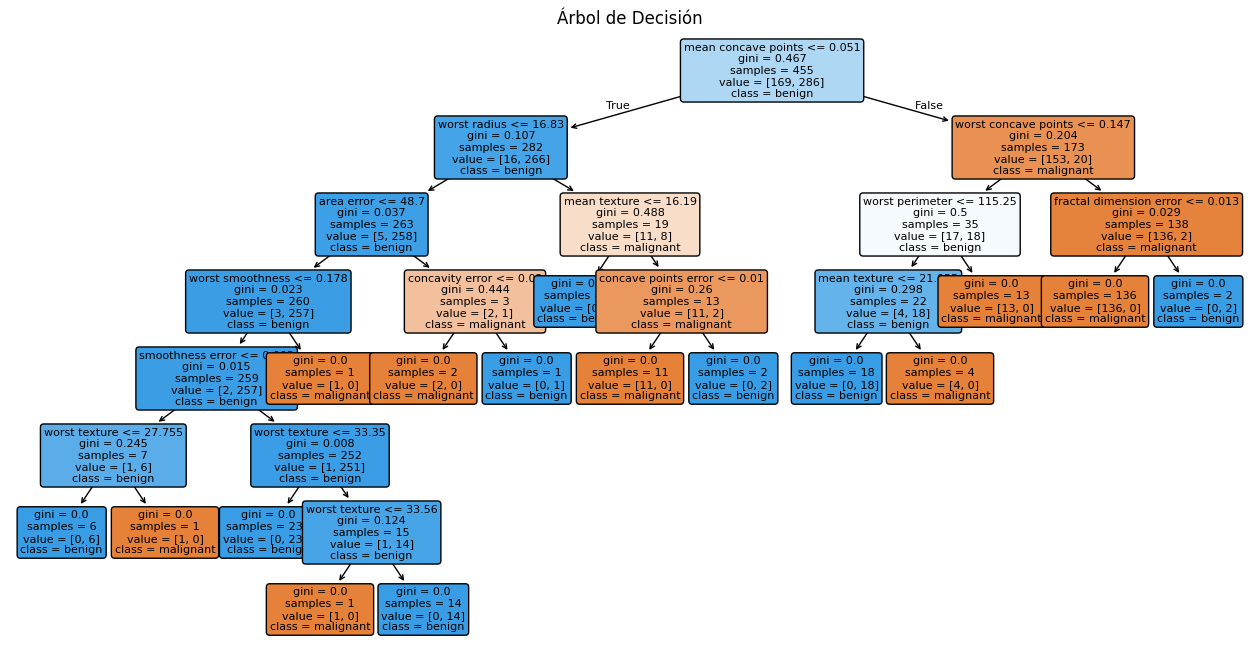

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(tree1,
          feature_names=X.columns,  # X es tu DataFrame con las variables predictoras
          class_names=['malignant', 'benign'],  # etiquetas manuales
          filled=True, rounded=True, fontsize=8)
plt.title("Árbol de Decisión")

plt.show()

In [ ]:
print("Train acc:", tree1.score(X_train, y_train))
print("Test acc:", tree1.score(X_test, y_test))

#el árbol sin optimizar tiene alta varianza (probablemente sobreajuste en el entrenamiento)

Train acc: 1.0
Test acc: 0.9473684210526315


---

# Optimización de los hiperparámetros

Como recordarás de la presentación, vimos tres estrategias para realizar una optimización de hiperparámetros:

    * Manual - lo vimos con K-means
    * Por grilla.
    * Aleatoria.
    
Como ya mencionamos la búsqueda manual puede resultar muy tediosa y poco eficiente, por lo tanto vamos a probar con las dos restantes: **grilla** y **aleatoria** .


# 1 - Grid Search

Definamos las grillas que necesitamos para el `GridSearchCV`. ¿Que tipo de objeto - desde el punto de vista de la programación - es? Prestar atención también qué tipo de datos usamos para cada hiperparámetro. Como siempre, mirar la documentación de la clase.

In [ ]:
# Creo el modelo supervisado - arbol de decisión
tree_1 = DecisionTreeClassifier(random_state=42)

In [ ]:
# seteo los hiperparametros para el arbol de decision - Grilla para Grid Search
param_grid_tree1 = {"max_depth": range(1, 10),
              "min_samples_leaf": range(1, 10), #puede ir de 1 a 20
              "min_samples_split": range(1, 10), #puede ir de 1 a 40
              "criterion": ["gini", "entropy"]}

In [ ]:
# ESTRATEGIA 1: Grid Search
model_GS = GridSearchCV(tree_1, param_grid=param_grid_tree1, cv=5) #5 folders

# Entrenamos el modelo con la grilla definida arriba y CV con tamaño de Fold=5
start = time.time()
model_GS.fit(X_train, y_train)
print("Tiempo de Grid Search:", time.time() - start)

Tiempo de Grid Search: 76.2608003616333


Genial, ya tenemos entrenado nuestro modelo de arbol de clasificación para una grilla de hiperparámetros. Además, dichas búsquedas por grilla vienen acompañadas de un validación cruzada, por lo cuál también hemos validado correctamente cada modelo con su correspondiente configuración de hiperparámetros.



In [ ]:
print("Mejores parametros: "+str(model_GS.best_params_))
print("Mejor Score: "+str(model_GS.best_score_)+'\n')

scores_1 = pd.DataFrame(model_GS.cv_results_)
scores_1

Mejores parametros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 9}
Mejor Score: 0.945054945054945



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000924,0.000303,0.000000,0.000000,gini,1,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1297
1,0.004261,0.000071,0.001784,0.000072,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.890110,0.857143,0.923077,0.901099,0.868132,0.887912,0.023466,1153
2,0.004157,0.000022,0.001718,0.000029,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.890110,0.857143,0.923077,0.901099,0.868132,0.887912,0.023466,1153
3,0.004219,0.000057,0.001720,0.000056,gini,1,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.890110,0.857143,0.923077,0.901099,0.868132,0.887912,0.023466,1153
4,0.004170,0.000031,0.001705,0.000026,gini,1,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.890110,0.857143,0.923077,0.901099,0.868132,0.887912,0.023466,1153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.009420,0.000543,0.002034,0.000065,entropy,9,9,5,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.967033,0.901099,0.945055,0.945055,0.912088,0.934066,0.024076,157
1454,0.009443,0.000091,0.002026,0.000041,entropy,9,9,6,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.967033,0.901099,0.945055,0.945055,0.912088,0.934066,0.024076,157
1455,0.009300,0.000491,0.001975,0.000043,entropy,9,9,7,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.967033,0.901099,0.945055,0.945055,0.912088,0.934066,0.024076,157
1456,0.009247,0.000365,0.001979,0.000050,entropy,9,9,8,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.967033,0.901099,0.945055,0.945055,0.912088,0.934066,0.024076,157


In [ ]:
model_GS

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

En este DataFrame están todos los resultados que devuelve `GridSearchCV()`. Hay mucha información para explorar, pero corre las siguientes celdas antes de hacerlo.

Podemos predecir con el mejor modelo de la siguiente manera:

In [ ]:
#Predecimos en los datos de test
prediction_GS = model_GS.predict(X_test)

In [ ]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction_GS)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[39  4]
 [ 1 70]]


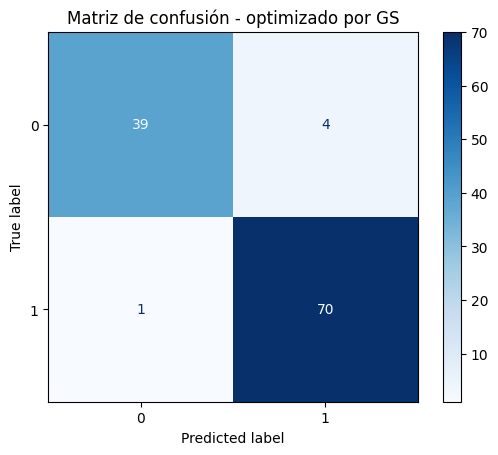

In [ ]:
# Matriz de confusión
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_GS), display_labels=[0,1]).plot(cmap='Blues')
plt.title("Matriz de confusión - optimizado por GS")
plt.show()

In [ ]:
print('Exactitud:', accuracy_score(y_test, prediction_GS))
acc_grid = accuracy_score(y_test, prediction_GS)

Exactitud: 0.956140350877193


In [ ]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction_GS)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



---

# 2 - Random Search

La metodología es muy parecida. La principal diferencia radica en que, para crear la grilla, ya no debemos pasar valores para los hiperparámetros, sino un generador aleatorio para cada atributo, en aquellos atributos que queremos que explore aleatoriamente.

In [ ]:
# Creo el modelo supervisado - arbol de decisión
tree__1 = DecisionTreeClassifier(random_state=42)

In [ ]:
# Grilla para Random Search - DT
from scipy.stats import randint

param_grid = {"max_depth": randint(1, 10), # profundidad máxima del árbol
              "min_samples_leaf": randint(1, 10), # mínimo de muestras en una hoja
              "min_samples_split": randint(1, 10), # mínimo de muestras para dividir un nodo
              "criterion": ["gini", "entropy"]} # función de impureza

Una vez definida la grilla, ya podemos entrenar el modelo.

Presta atención a la documentación, para entender qué hace (es un poco larga, con el comienzo es suficiente):

In [ ]:
help(sp.stats.randint)

Help on randint_gen in module scipy.stats._discrete_distns:

<scipy.stats._discrete_distns.randint_gen object>
    A uniform discrete random variable.

    As an instance of the `rv_discrete` class, `randint` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(low, high, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, low, high, loc=0)
        Probability mass function.
    logpmf(k, low, high, loc=0)
        Log of the probability mass function.
    cdf(k, low, high, loc=0)
        Cumulative distribution function.
    logcdf(k, low, high, loc=0)
        Log of the cumulative distribution function.
    sf(k, low, high, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, low, high, loc=0)
        Log of the survival function.
    ppf(q, low, high, loc=0)

Ya podemos entrenar nuestro modelo. Presta atención al parámetro `n_iter`.

In [ ]:
# ESTRATEGIA 2: Random Search
model_RS = RandomizedSearchCV(tree__1, param_distributions=param_grid, n_iter=100, cv=5)

# Entrenamos con los hiperparametros definidos arriba y CV con tamaño de Fold=5
start = time.time()
model_RS.fit(X_train, y_train)
print("Tiempo de Random Search:", time.time() - start)

Tiempo de Random Search: 5.195491313934326


In [ ]:
print("Mejores parametros: "+str(model_RS.best_params_))
print("Mejor Score: "+str(model_RS.best_score_)+'\n')

scores_RS = pd.DataFrame(model_RS.cv_results_)
scores_RS

Mejores parametros: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 9}
Mejor Score: 0.9428571428571428



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001535,0.000880,0.000000,0.000000,gini,7,7,1,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
1,0.009549,0.000424,0.002329,0.000148,gini,6,7,7,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.923077,0.912088,0.945055,0.912088,0.912088,0.920879,0.012815,52
2,0.009758,0.000453,0.002171,0.000162,entropy,6,6,8,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.967033,0.901099,0.912088,0.945055,0.901099,0.925275,0.026374,41
3,0.009512,0.000503,0.002175,0.000119,entropy,4,8,4,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.967033,0.901099,0.945055,0.945055,0.912088,0.934066,0.024076,11
4,0.009919,0.000745,0.002090,0.000061,entropy,6,5,8,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.967033,0.901099,0.945055,0.945055,0.901099,0.931868,0.026374,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.009880,0.000403,0.002581,0.000090,gini,3,6,8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.934066,0.901099,0.945055,0.934066,0.945055,0.931868,0.016150,28
96,0.000859,0.000043,0.000000,0.000000,gini,8,3,1,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
97,0.011956,0.000363,0.002607,0.000051,gini,7,8,4,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.923077,0.912088,0.945055,0.912088,0.901099,0.918681,0.014906,62
98,0.012240,0.000656,0.002769,0.000084,gini,4,1,4,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.890110,0.912088,0.978022,0.901099,0.923077,0.920879,0.030612,52


In [ ]:
model_RS

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd644603aa0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd64461d7c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd64443de20>})

¿Encontró algo parecido a Grid Search?¿Fue más rápido?

In [ ]:
#Predecimos en los datos de test
prediction_RS = model_RS.predict(X_test)

In [ ]:
# Matriz de Confusion
cm_RS = confusion_matrix(y_test,prediction_RS)
print("Matriz de confusión:")
print(cm_RS)

Matriz de confusión:
[[39  4]
 [ 1 70]]


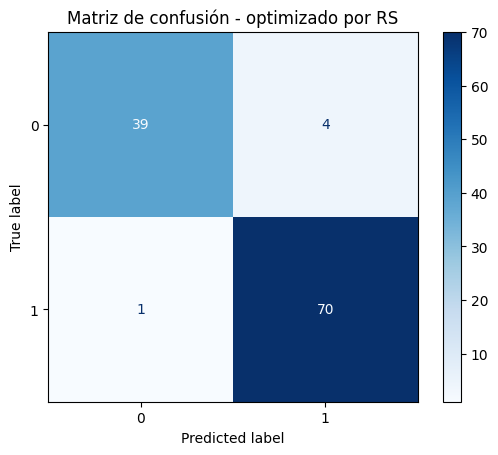

In [ ]:
# Matriz de confusión
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_RS), display_labels=[0,1]).plot(cmap='Blues')
plt.title("Matriz de confusión - optimizado por RS")
plt.show()

In [ ]:
print('Exactitud:', accuracy_score(y_test, prediction_RS))
acc_random = accuracy_score(y_test, prediction_RS)

Exactitud: 0.956140350877193


In [ ]:
# Reporte de Clasificacion
report_RS = classification_report(y_test, prediction_RS)
print("Reporte de Clasificación:")
print(report_RS)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# COMPARACION FINAL DE LA EXACTITUD DE LOS 3 MODELOS

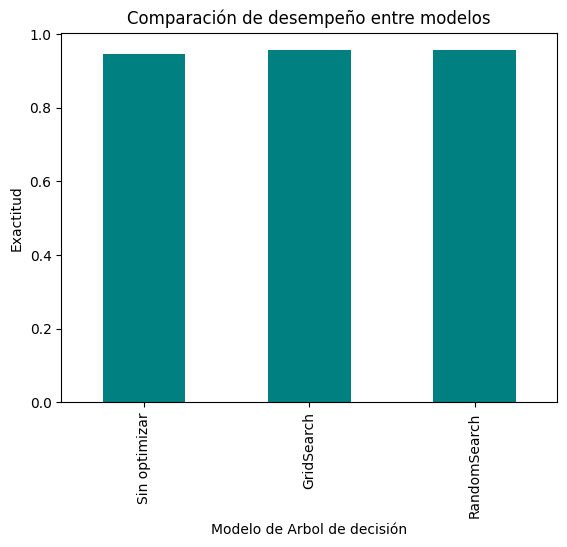

In [ ]:
resultados = pd.DataFrame({
    "Modelo de Arbol de decisión": ["Sin optimizar", "GridSearch", "RandomSearch"],
    "Accuracy": [acc_base, acc_grid, acc_random]
})
resultados.plot(x="Modelo de Arbol de decisión", y="Accuracy", kind="bar", color="teal", legend=False)
plt.title("Comparación de desempeño entre modelos")
plt.ylabel("Exactitud")
plt.show()

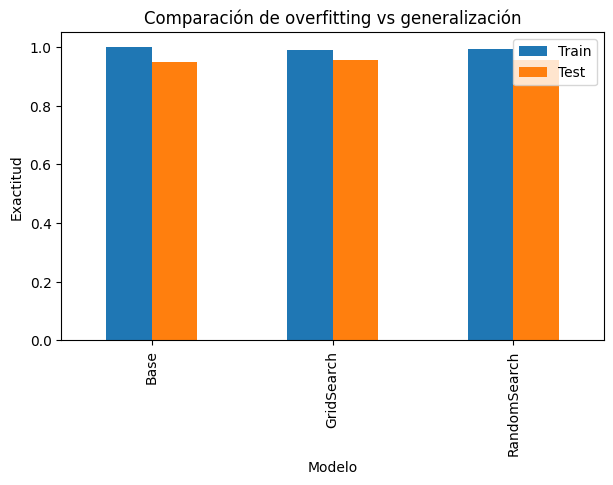

In [ ]:
# Comparación visual final
modelos = ["Base", "GridSearch", "RandomSearch"]
train_scores = [tree1.score(X_train, y_train),
                model_GS.score(X_train, y_train),
                model_RS.score(X_train, y_train)]
test_scores = [tree1.score(X_test, y_test),
               model_GS.score(X_test, y_test),
               model_RS.score(X_test, y_test)]

df_scores = pd.DataFrame({
    "Modelo": modelos,
    "Train": train_scores,
    "Test": test_scores
})

df_scores.plot(x="Modelo", y=["Train", "Test"], kind="bar", figsize=(7,4))
plt.title("Comparación de overfitting vs generalización")
plt.ylabel("Exactitud")
plt.show()